# AEDの位置情報の分析と可視化

- AED一覧の住所から位置情報を引く(geocoding)
- 位置情報をマップに表示
- 千城台駅からの距離順にソート
- 若葉区内のAEDを絞り込む

## AED一覧の住所から位置情報を引く
住所→緯度経度を引くことをGeocodingといいます。
geocoderを使ってGoogleから位置情報を引く。

In [2]:
# まずはAEDの位置情報をpandasに読み込む
import pandas as pd

df = pd.read_excel('data/290301chibacity.xlsx', header=2, skip_footer=1)
df.head(5)

,番号,施設名,施設住所,ＡＥＤ 設置 台数,設置場所,Unnamed: 5
0,1.0,千葉市中央ｺﾐｭﾆﾃｨｾﾝﾀｰ,千葉市中央区千葉港2番1号,1.0,４階 事務室,NaN
1,2.0,千葉市中央ｺﾐｭﾆﾃｨｾﾝﾀｰ松波分室,千葉市中央区松波2丁目14番8号\n,1.0,事務室,NaN
2,3.0,千葉市高原千葉村,群馬県利根郡みなかみ町相俣2325番地,1.0,管理事務所,NaN
3,4.0,千葉市文化センター,千葉市中央区中央2丁目5番1号,1.0,４階 受付,NaN
4,5.0,千葉市民会館,千葉市中央区要町1番1号,1.0,１階 受付事務室内,NaN


In [3]:
# geocoderで位置情報を引く
import geocoder

geocoder.google("千葉市役所", cache=True).latlng
# http://www.gsi.go.jp/KOKUJYOHO/CENTER/kendata/chiba_heso.htm
# 千葉市役所
# 緯度 140°06′23
# 経度 35°36′26
# →経度緯度の順番で持ってきている。。。。

[35.6073655, 140.106334]

In [4]:
address = df["施設住所"][0]
name = df["施設名"][0]
g = geocoder.google(address)
address, name, len(g), g.latlng


('千葉市中央区千葉港2番1号', '千葉市中央ｺﾐｭﾆﾃｨｾﾝﾀｰ', 1, [35.6067088, 140.1081767])

### 全部の住所から位置情報を引く
API制限掛かりそうなので実際にはやらないでください。

In [12]:
from time import sleep

def find_latlng(x):
    address = x['施設住所']
    if isinstance(address, str):
        print("find:" + address)
        sleep(3)
        geo_ret = geocoder.google(address, cache=True)
        if len(geo_ret) > 0:
            latlng = geo_ret.latlng
            print("geocoding result:")
            print(latlng)
            return pd.Series([latlng[1], latlng[0]], index=['lat', 'lng'])

    return pd.Series([None, None], index=['lat', 'lng'])

latlng_df = df.apply(find_latlng, axis=1)
df = pd.concat([df, latlng_df], axis=1)
df.head()

find:千葉市中央区千葉港2番1号
geocoding result:
[35.6067088, 140.1081767]
find:千葉市中央区千葉港2番1号
geocoding result:
[35.6067088, 140.1081767]
find:千葉市中央区松波2丁目14番8号

geocoding result:
[35.6210895, 140.1063842]
find:群馬県利根郡みなかみ町相俣2325番地
geocoding result:
[36.7502905, 138.8922885]
find:千葉市中央区中央2丁目5番1号
find:千葉市中央区要町1番1号
geocoding result:
[35.6154138, 140.1202723]
find:千葉市稲毛区稲毛1丁目8番35号
geocoding result:
[35.6342328, 140.0831654]
find:千葉市中央区富士見１丁目3番2号
geocoding result:
[35.6131806, 140.1174366]
find:千葉市美浜区真砂5丁目15番2号
geocoding result:
[35.641077, 140.0625404]
find:千葉市美浜区高洲4丁目2番1号
geocoding result:
[35.63373350000001, 140.07557]
find:千葉市若葉区北谷津町327番地の1
find:千葉市若葉区みつわ台3丁目3番1号
geocoding result:
[35.6409193, 140.1362616]
find:千葉市中央区末広2丁目11番24号
find:千葉市稲毛区宮野木町2150番地4
geocoding result:
[35.6629334, 140.1060802]
find:千葉市緑区古市場町474番地の277
geocoding result:
[35.5497264, 140.1465628]
find:千葉市花見川区三角町750番地
find:千葉市若葉区中田町1200番地1
find:千葉市中央区問屋町1番20号
geocoding result:
[35.6029597, 140.1113823]
find:千葉市美浜区新港224番地1
find:千葉市若葉区下田

geocoding result:
[35.6258051, 140.101165]
find:千葉市花見川区花園4丁目1番2号
geocoding result:
[35.6565057, 140.0738722]
find:千葉市花見川区犢橋町774番地
geocoding result:
[35.673521, 140.1080242]
find:千葉市花見川区横戸町1005番地
geocoding result:
[35.6961964, 140.1203855]
find:千葉市花見川区幕張町4丁目781番地
geocoding result:
[35.662055, 140.0539155]
find:千葉市花見川区長作町1273番地
geocoding result:
[35.6840888, 140.0738548]
find:千葉市中央区浜野町1335番地
geocoding result:
[35.5593253, 140.1402018]
find:千葉市緑区茂呂町582番地
geocoding result:
[35.541808, 140.1633955]
find:千葉市緑区誉田町1丁目27番地
geocoding result:
[35.5496572, 140.2041096]
find:千葉市稲毛区轟町3丁目4番30号
geocoding result:
[35.6302937, 140.1082862]
find:千葉市中央区鶴沢町21番1号
geocoding result:
[35.6098373, 140.1336162]
find:千葉市緑区辺田町141番地
find:千葉市中央区松ケ丘町580番地
geocoding result:
[35.5864343, 140.1554276]
find:千葉市若葉区野呂町215番地
geocoding result:
[35.5807957, 140.2311367]
find:千葉市若葉区更科町2073番地
geocoding result:
[35.6196954, 140.2276616]
find:千葉市中央区宮崎2丁目3番13号
geocoding result:
[35.583662, 140.1365409]
find:千葉市稲毛区緑町2丁目13番1号
geocod

find:千葉市緑区おゆみ野南5丁目25番地
geocoding result:
[35.5445497, 140.1769975]
find:千葉市若葉区大宮町1066番地の1
geocoding result:
[35.5975441, 140.1670466]
find:千葉市稲毛区轟町3丁目6番25号
find:千葉市稲毛区小仲台9丁目46番1号
geocoding result:
[35.6448049, 140.0999755]
find:千葉市美浜区高浜3丁目1番1号
geocoding result:
[35.6204099, 140.0680236]
find:千葉市美浜区磯辺4丁目16番1号
geocoding result:
[35.6315558, 140.058227]
find:千葉市美浜区磯辺7丁目1番1号
geocoding result:
[35.6326807, 140.0541635]
find:千葉市美浜区真砂5丁目18番地1
geocoding result:
[35.64397940000001, 140.0615265]
find:千葉市中央区弁天3丁目7番7号
find:千葉市稲毛区小仲台5丁目7番1号
geocoding result:
[35.6393639, 140.0990674]
find:千葉市若葉区更科町2254番地の1
geocoding result:
[35.6178316, 140.227809]
find:千葉市中央区松ケ丘町257-2
geocoding result:
[35.5881452, 140.1518253]
find:千葉市中央区生実町67-1　
geocoding result:
[35.559617, 140.1418237]
find:千葉市中央区新宿2-16-14
geocoding result:
[35.6068509, 140.1137957]
find:千葉市中央区宮崎2-5-22
geocoding result:
[35.5805983, 140.1368241]
find:千葉市中央区葛城2-9-2
find:千葉市中央区末広3-2-2
geocoding result:
[35.5939945, 140.1251813]
find:千葉市中央区椿森6-1-

csvから緯度経度付きのデータを読み込みます。

In [5]:
df = pd.read_csv("data/aed_latlng.csv")
df.head()

,Unnamed: 0,番号,施設名,施設住所,ＡＥＤ 設置 台数,設置場所,Unnamed: 5,lng,lat
0,0,1.0,千葉市中央ｺﾐｭﾆﾃｨｾﾝﾀｰ,千葉市中央区千葉港2番1号,1.0,４階 事務室,NaN,35.606709,140.108177
1,1,2.0,千葉市中央ｺﾐｭﾆﾃｨｾﾝﾀｰ松波分室,千葉市中央区松波2丁目14番8号\n,1.0,事務室,NaN,35.621090,140.106384
2,2,3.0,千葉市高原千葉村,群馬県利根郡みなかみ町相俣2325番地,1.0,管理事務所,NaN,36.750291,138.892289
3,3,4.0,千葉市文化センター,千葉市中央区中央2丁目5番1号,1.0,４階 受付,NaN,NaN,NaN
4,4,5.0,千葉市民会館,千葉市中央区要町1番1号,1.0,１階 受付事務室内,NaN,35.615414,140.120272


## 位置情報をマップに表示
foliumを使って先程取得した位置情報をMapに表示します。

In [6]:
import folium
center = g.latlng
m = folium.Map(
    location=center,
    zoom_start=20
)

# htmlタグも使える
# folium.Marker(g.latlng, popup="<i>"+name+"</i>").add_to(m)

folium.Marker(g.latlng, popup=name).add_to(m)

m

In [7]:
# geo_jsonを読みこむこともできる
m = folium.Map(
    location=center,
    zoom_start=20
)

folium.GeoJson(
    g.geojson
).add_to(m)

m


### 複数の地点をMAPに出す

In [8]:
# 位置情報がとれなかったデータを削除する
df = df.dropna(axis=0, subset=['lat'])
df.head()


,Unnamed: 0,番号,施設名,施設住所,ＡＥＤ 設置 台数,設置場所,Unnamed: 5,lng,lat
0,0,1.0,千葉市中央ｺﾐｭﾆﾃｨｾﾝﾀｰ,千葉市中央区千葉港2番1号,1.0,４階 事務室,NaN,35.606709,140.108177
1,1,2.0,千葉市中央ｺﾐｭﾆﾃｨｾﾝﾀｰ松波分室,千葉市中央区松波2丁目14番8号\n,1.0,事務室,NaN,35.621090,140.106384
2,2,3.0,千葉市高原千葉村,群馬県利根郡みなかみ町相俣2325番地,1.0,管理事務所,NaN,36.750291,138.892289
4,4,5.0,千葉市民会館,千葉市中央区要町1番1号,1.0,１階 受付事務室内,NaN,35.615414,140.120272
5,5,6.0,千葉市民ギャラリー・いなげ,千葉市稲毛区稲毛1丁目8番35号,1.0,１階 事務室内,NaN,35.634233,140.083165


In [9]:
# 千葉駅の緯度経度を引く
chiba_station = geocoder.google("千葉駅", cache=True)
chiba_station_latlng = chiba_station.latlng

m = folium.Map(location=chiba_station_latlng,
               zoom_start=15)
# 列ごとにloop
for index, row in df.iterrows():
    folium.Marker(location=[row['lng'], row['lat']], popup=row["施設名"]).add_to(m)
m


## 若葉区内のAEDを探す
geopandasを使って位置情報の絞込を行う
### まずはgeopandasが持っているサンプルデータを表示してみる

In [10]:
%matplotlib inline
import geopandas as gpd
# libspatialindex_c が必要かも

In [11]:
# geopandasが持ってるdetasetから世界地図を読み込んでみる
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


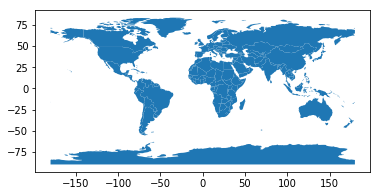

In [12]:
# 世界地図のポリゴンが表示される
world.plot()

In [13]:
# 世界地図の座標系はこれ
world.crs

{'init': 'epsg:4326'}

In [14]:
# ポリゴンの中心点を作る
world['centroid'] = world.centroid
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,centroid
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,...",POINT (66.08669022192834 33.85639928169076)
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...,POINT (17.47057255231345 -12.24586903613316)
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,...",POINT (20.03242643144321 41.14135330604877)
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,...",POINT (54.20671476159633 23.86863365334761)
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...,POINT (-65.17536077114174 -35.44682148949509)


### 再びAEDの情報を見ていく

In [15]:
#  AEDの位置情報を確認
df.head()

,Unnamed: 0,番号,施設名,施設住所,ＡＥＤ 設置 台数,設置場所,Unnamed: 5,lng,lat
0,0,1.0,千葉市中央ｺﾐｭﾆﾃｨｾﾝﾀｰ,千葉市中央区千葉港2番1号,1.0,４階 事務室,NaN,35.606709,140.108177
1,1,2.0,千葉市中央ｺﾐｭﾆﾃｨｾﾝﾀｰ松波分室,千葉市中央区松波2丁目14番8号\n,1.0,事務室,NaN,35.621090,140.106384
2,2,3.0,千葉市高原千葉村,群馬県利根郡みなかみ町相俣2325番地,1.0,管理事務所,NaN,36.750291,138.892289
4,4,5.0,千葉市民会館,千葉市中央区要町1番1号,1.0,１階 受付事務室内,NaN,35.615414,140.120272
5,5,6.0,千葉市民ギャラリー・いなげ,千葉市稲毛区稲毛1丁目8番35号,1.0,１階 事務室内,NaN,35.634233,140.083165


In [16]:
# うまく緯度経度が取れなかったやつを削除する
df = df.dropna(axis=0, subset=['lat'])
df.head()

,Unnamed: 0,番号,施設名,施設住所,ＡＥＤ 設置 台数,設置場所,Unnamed: 5,lng,lat
0,0,1.0,千葉市中央ｺﾐｭﾆﾃｨｾﾝﾀｰ,千葉市中央区千葉港2番1号,1.0,４階 事務室,NaN,35.606709,140.108177
1,1,2.0,千葉市中央ｺﾐｭﾆﾃｨｾﾝﾀｰ松波分室,千葉市中央区松波2丁目14番8号\n,1.0,事務室,NaN,35.621090,140.106384
2,2,3.0,千葉市高原千葉村,群馬県利根郡みなかみ町相俣2325番地,1.0,管理事務所,NaN,36.750291,138.892289
4,4,5.0,千葉市民会館,千葉市中央区要町1番1号,1.0,１階 受付事務室内,NaN,35.615414,140.120272
5,5,6.0,千葉市民ギャラリー・いなげ,千葉市稲毛区稲毛1丁目8番35号,1.0,１階 事務室内,NaN,35.634233,140.083165


#### DataframeをGeoDataframeに変換する

In [17]:
# geopandasの内部で使っているshapely.geometry.Point型に変換する
from shapely.geometry import Point

geometry = df.apply(lambda x: Point(x['lat'], x['lng']), axis=1)
geometry.head()

0           POINT (140.1081767 35.6067088)
1           POINT (140.1063842 35.6210895)
2    POINT (138.8922885 36.75029050000001)
4           POINT (140.1202723 35.6154138)
5           POINT (140.0831654 35.6342328)
dtype: object

In [31]:
# dfと先程のgeometry列をつなげてgeoDataframeを作る
# 座標系はepsg:4612
# これを設定しないとfoliumを使ってmapに出せない

gdf = gpd.GeoDataFrame(df, geometry=geometry, crs= {'init' :'epsg:4612'})
gdf.head()

,Unnamed: 0,番号,施設名,施設住所,ＡＥＤ 設置 台数,設置場所,Unnamed: 5,lng,lat,geometry
0,0,1.0,千葉市中央ｺﾐｭﾆﾃｨｾﾝﾀｰ,千葉市中央区千葉港2番1号,1.0,４階 事務室,NaN,35.606709,140.108177,POINT (140.1081767 35.6067088)
1,1,2.0,千葉市中央ｺﾐｭﾆﾃｨｾﾝﾀｰ松波分室,千葉市中央区松波2丁目14番8号\n,1.0,事務室,NaN,35.621090,140.106384,POINT (140.1063842 35.6210895)
2,2,3.0,千葉市高原千葉村,群馬県利根郡みなかみ町相俣2325番地,1.0,管理事務所,NaN,36.750291,138.892289,POINT (138.8922885 36.75029050000001)
4,4,5.0,千葉市民会館,千葉市中央区要町1番1号,1.0,１階 受付事務室内,NaN,35.615414,140.120272,POINT (140.1202723 35.6154138)
5,5,6.0,千葉市民ギャラリー・いなげ,千葉市稲毛区稲毛1丁目8番35号,1.0,１階 事務室内,NaN,35.634233,140.083165,POINT (140.0831654 35.6342328)


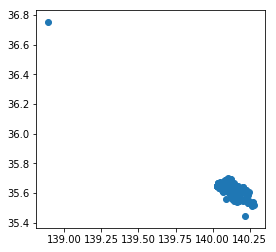

In [32]:
# plotしてみる
gdf.plot()

In [33]:
#### foliumで表示してみる(folium.features.GeoJsonを使って表示する)

In [34]:
import geocoder
import folium

chiba_station = geocoder.google("千葉駅")
chiba_station_latlng = chiba_station.latlng

m = folium.Map(
    location=chiba_station_latlng,
    zoom_start=13
)

# folium.GeoJson()にgeoDataframeやgeoSeriesのインスタンスを入れてもfolium.features.GeoJsonが作れるっぽい
folium.GeoJson(gdf).add_to(m)

m


### 若葉区のPolygonを作る

In [21]:
chiba_ken = gpd.read_file("data/千葉県の市区町村.geojson")

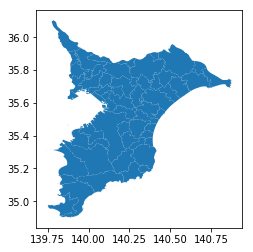

In [22]:
chiba_ken.plot()

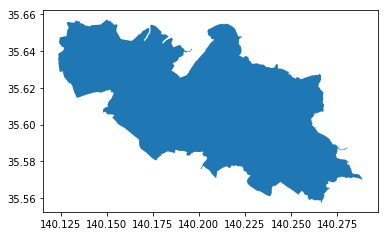

In [23]:
wakaba_ku = chiba_ken[chiba_ken["N03_004"]== "若葉区"]
# 処理しやすいようにindexをreset
wakaba_ku.reset_index(drop=True, inplace=True)
wakaba_ku.plot()

In [24]:
# wakaba_ku.centroidがGeoDataframe型なのでindexの0を指定する
wakaba_ku_centroid = wakaba_ku.centroid[0]
# wakaba_ku_polygon.to_crs(epsg='4612')

wakaba_ku_map = folium.Map(location=[wakaba_ku_centroid.y,wakaba_ku_centroid.x],
                  zoom_start=13)
folium.GeoJson(wakaba_ku).add_to(wakaba_ku_map)

wakaba_ku_map

### AEDの情報を絞りこむ

In [35]:
gdf.head()

,Unnamed: 0,番号,施設名,施設住所,ＡＥＤ 設置 台数,設置場所,Unnamed: 5,lng,lat,geometry
0,0,1.0,千葉市中央ｺﾐｭﾆﾃｨｾﾝﾀｰ,千葉市中央区千葉港2番1号,1.0,４階 事務室,NaN,35.606709,140.108177,POINT (140.1081767 35.6067088)
1,1,2.0,千葉市中央ｺﾐｭﾆﾃｨｾﾝﾀｰ松波分室,千葉市中央区松波2丁目14番8号\n,1.0,事務室,NaN,35.621090,140.106384,POINT (140.1063842 35.6210895)
2,2,3.0,千葉市高原千葉村,群馬県利根郡みなかみ町相俣2325番地,1.0,管理事務所,NaN,36.750291,138.892289,POINT (138.8922885 36.75029050000001)
4,4,5.0,千葉市民会館,千葉市中央区要町1番1号,1.0,１階 受付事務室内,NaN,35.615414,140.120272,POINT (140.1202723 35.6154138)
5,5,6.0,千葉市民ギャラリー・いなげ,千葉市稲毛区稲毛1丁目8番35号,1.0,１階 事務室内,NaN,35.634233,140.083165,POINT (140.0831654 35.6342328)


### 絞込を行う

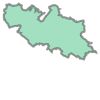

In [36]:
# Polygonのインスタンスが取れていること
wakaba_ku_polygon = wakaba_ku['geometry'][0]
wakaba_ku_polygon

In [27]:
within_wakaba_ku = gdf[gdf.within(wakaba_ku_polygon)]
within_wakaba_ku.head()

,Unnamed: 0,番号,施設名,施設住所,ＡＥＤ 設置 台数,設置場所,Unnamed: 5,lng,lat,geometry
10,10,11.0,千葉市みつわ台体育館,千葉市若葉区みつわ台3丁目3番1号,1.0,１階 事務室,NaN,35.640919,140.136262,POINT (140.1362616 35.6409193)
18,18,19.0,千葉市民ゴルフ場,千葉市若葉区下田町1005番地,2.0,クラブハウス棟フロント,NaN,35.639804,140.206265,POINT (140.2062652 35.6398044)
19,19,NaN,千葉市民ゴルフ場,千葉市若葉区下田町1005番地,NaN,クラブハウス棟マスター室,NaN,35.639804,140.206265,POINT (140.2062652 35.6398044)
26,26,26.0,若葉区役所,千葉市若葉区桜木北2丁目1番1号,1.0,１階 守衛室,NaN,35.634016,140.155653,POINT (140.1556526 35.6340161)
34,34,34.0,千葉市若葉いきいきプラザ,千葉市若葉区北谷津町333番地2,1.0,１階 事務室,NaN,35.610701,140.203754,POINT (140.2037537 35.6107011)


In [30]:
folium.GeoJson(within_wakaba_ku).add_to(wakaba_ku_map)
wakaba_ku_map